In [1]:
%matplotlib inline

import numpy as np
import math as mt
import matplotlib.pyplot as plt
import time
import FFT

# Cálculo da FFT inversa

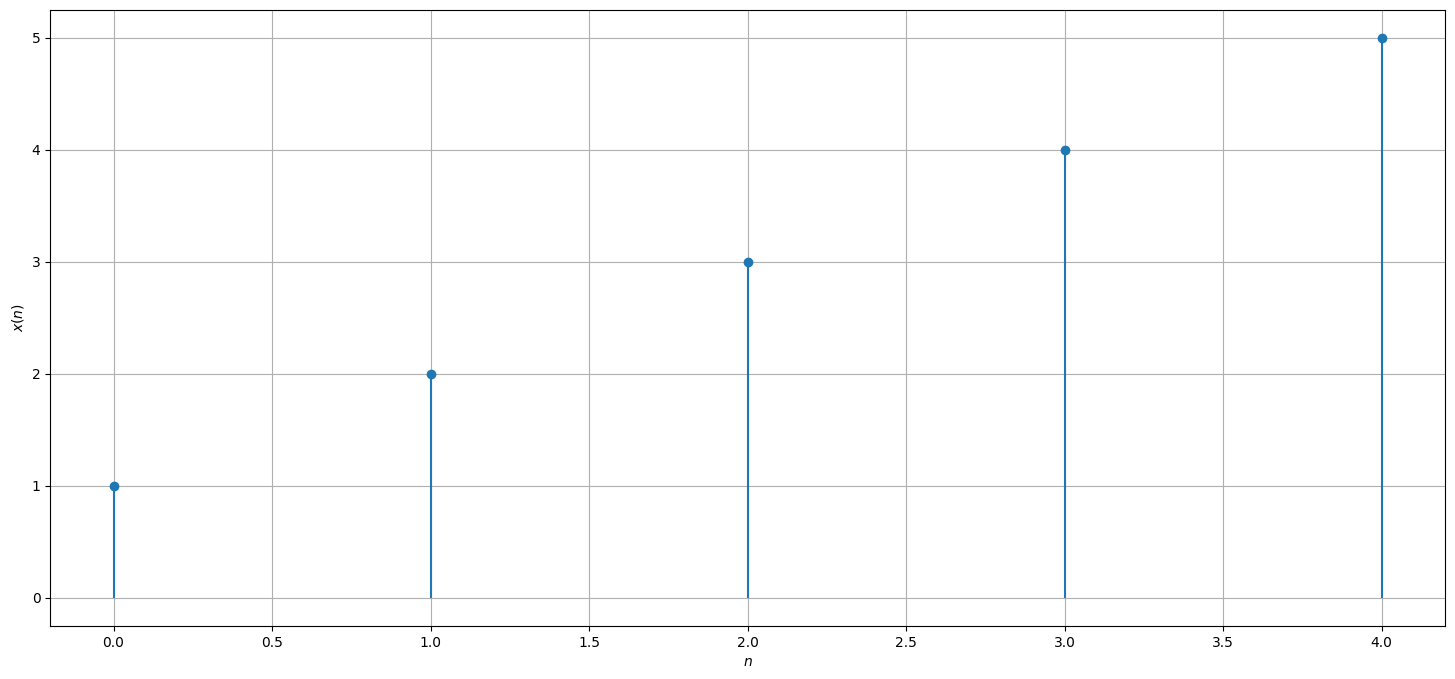

In [2]:
y = [1,2,3,4,5]

plt.figure( figsize=(18,8))
(markerline, stemlines, baseline) = plt.stem(y)
plt.xlabel("$n$")
plt.ylabel("$x(n)$")
plt.grid(True)
baseline.set_visible(False)

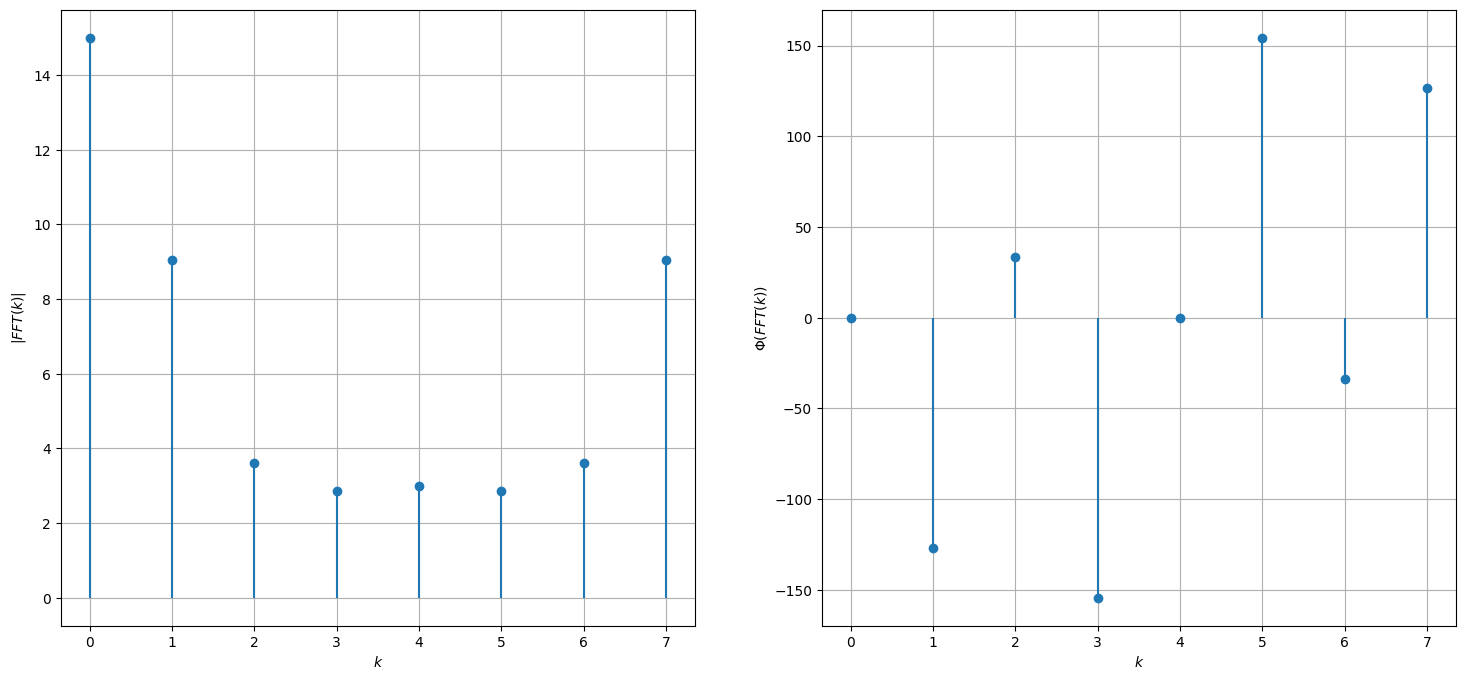

In [3]:
FFT_ =  FFT.fft_completa(y)

figure,axis = plt.subplots(1,2, figsize=(18,8))
(markerline, stemlines, baseline) = axis[0].stem((abs(FFT_)))
axis[0].set_xlabel("$k$")
axis[0].set_ylabel("$|FFT(k)|$")
axis[0].grid(True)
baseline.set_visible(False)

(markerline, stemlines, baseline) = axis[1].stem((np.angle(FFT_)*180/np.pi))
axis[1].set_xlabel("$k$")
axis[1].set_ylabel("$\Phi(FFT(k))$")
axis[1].grid(True)
baseline.set_visible(False)

Para o cálculo da **FFT inversa**, a definição é similar ao que foi visto para a **FFT**.

$$
x(n) = \frac{1}{N} \sum_{n=0}^{N-1} \hat{x}(k) e^{j 2k\pi n/N }
$$

O algoritmo é praticamente a mesma coisa. Abaixo será descrito.

In [4]:
def Wn_inverso(N):
    wn = np.exp(1j*2*np.pi/N)
    return wn

def fft_inversa(y):    
    #eh preciso saber o valor de N para que tenha fim na recursividade quando N=1.
    N = int(len(y))

    X = np.zeros(N, dtype= complex)
    
    #Quando N=1 retorno o proprio sinal
    if(N==1):
        return y
    
    # print("y = ",y,"\n")

    #y ja eh reordenado, ou seja, a primeira metade do vetor sao os pares e a outra metade os impares
    par = y[0:N//2]
    impar = y[N//2::]

    # print("y pares = ", par,"\n")
    
    #aqui eh feita a recursividade
    Ak = fft_inversa(par)
    Bk = fft_inversa(impar)
    wn = Wn_inverso(N)

    # print(wn)
    for k in range(N//2):
        p = Bk[k]*(wn)**k
        X[k] = Ak[k] + p
        X[k+N//2] = Ak[k] - p
        # print(k,"A= ", Ak[k],"B = ", Bk[k], f"X({k}) = ", X[k], f"X({k+N//2}) = ", X[k+N//2])
    return X

def fft_inversa_completa(y):
    y_reordenado = FFT.reordenar(y)
    FFT_RESULTADO = 1/(len(y_reordenado))*fft_inversa(y_reordenado)
    return FFT_RESULTADO

C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:3463: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\gson5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


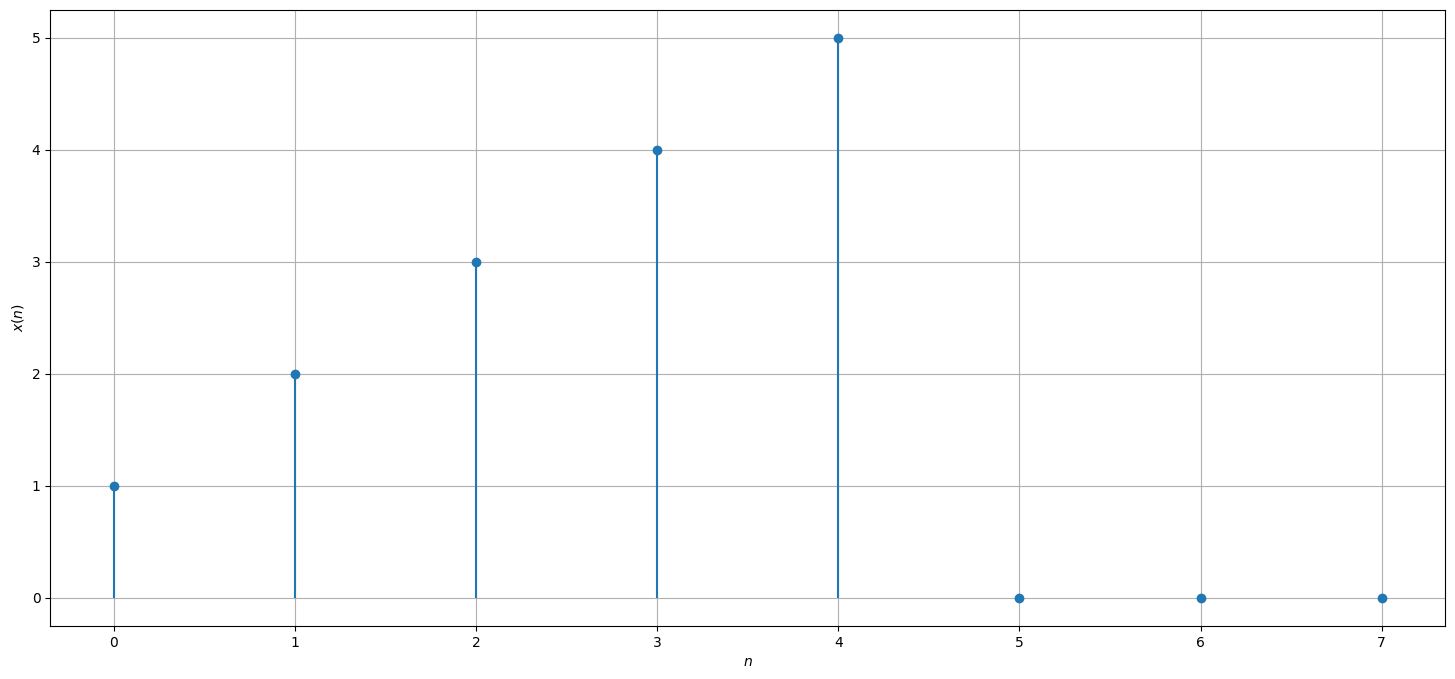

In [5]:
FFT_2 =  fft_inversa_completa(FFT_)

plt.figure( figsize=(18,8))
(markerline, stemlines, baseline) = plt.stem(FFT_2)
plt.xlabel("$n$")
plt.ylabel("$x(n)$")
plt.grid(True)
baseline.set_visible(False)

## Convolução

Ao realizar a convolução de dois sinais distintos, $x_1(n)$ e $x_2(n)$, pode ser um grande problema para ser implementado. Note pela expressão que o descreve:

$$
x_1(n) \ast x_2(n) =  \sum_{m=0}^{N-1} x_1(n) x_2((n-m) \text{ MOD } N)
$$

Onde MOD é a função resto da divisão. Como uma alternativa, pode-se utilizar uma das propriedades da convolução:

$$
x_1(n) \ast x_2(n) \xrightarrow{\mathcal{F}} \hat{x_1}(k) \hat{x_2}(k) \xrightarrow{\mathcal{F}^{-1}} X_1(n) \circledast X_2(n)
$$

Ou seja, ao invés de cálcular pelo somatório, simplesmente pode-se calcular a FFT de cada sinal, multiplicar seus espectros e posteriormente realizar a FFT inversa do sinal. Porém note que a inversa resulta na convolução circular, já que $\hat{x_1}(k)$ e $\hat{x_2}(k)$ são sinais periódicos em N e ambos $X_1(n)$ e $X_2(n)$ também serão periódicos em N (***), ou seja, não se trata da convolução linear convencional, mas sim uma convolução circular, pois temos a convolução entre sinais periódicos.


Para contornar o problema, digamos que, dentro do período, o sinal $x_1(n)$ tenha tamanho N e $x_2(n)$ tenha tamanho P, então, para obter a convolução linear, seria obtido um sinal de tamanho $N+P-1$. Preenchendo com zeros (zero padding) de tal forma que tanto $x_1(n)$ quanto $x_2(n)$ fiquem com tamanho $2^{ceil(log_2(N+P-1))}$, passamos de uma convolução circular para linear. Um exemplo prático seria definir um sinal $f_1(n)$ (de tamanho 4) e outro sinal $f_2(n)$ (de tamanho 3). O resultado da convolução dos dois seria um sinal $f_R(n)$ de tamanho 6, cuja potência de 2 mais próxima é 8. Se fóssemos fazer a FFT de $f_1(n)$, não precisaríamos fazer o zero padding, pois já é um sinal de tamanho base de 2, porém para a convolução passar a ser linear, devemos ainda acrescentar 4 zeros. O mesmo pensamento para $f_2(n)$, que bastaria um zero para obter a FFT, porém, para calcular a convolução precisamos acrescentar 5 zeros. É de extrema importância que ambos os sinais possuam o mesmo tamanho.


(***):
Sabe-se que:
$$
x(n) = \frac{1}{N} \sum_{n=0}^{N-1} \hat{x}(k) e^{j 2k\pi n/N }
$$

Então, avaliando $x(n+N)$:

$$
x(n + N) = \frac{1}{N} \sum_{n=0}^{N-1} \hat{x}(k) e^{j 2(k+N)\pi n/N }
$$

$$
x(n + N) = \frac{1}{N} \sum_{n=0}^{N-1} \hat{x}(k) e^{j 2k\pi n/N }\underbrace{e^{j 2\pi n }}_{1}
$$

$$
x(n + N) = \frac{1}{N} \sum_{n=0}^{N-1} \hat{x}(k) e^{j 2k\pi n/N } = x(n)
$$

In [6]:
def convolucao(x1,x2):
    #tamanho da convolucao
    M = len(x1)+len(x2)-1

    #qntd de zeros para que x1 e x2 possua tamanho M
    zeros_x1 = 2**mt.ceil(np.log2(M)) - len(x1)
    zeros_x2 = 2**mt.ceil(np.log2(M)) - len(x2)

    #zeros acrescentados
    x1 = np.append(x1, np.zeros(zeros_x1))
    x2 = np.append(x2, np.zeros(zeros_x2))

    #calculo da fft dos dois sinais
    FFT_x1 = FFT.fft_completa(x1)
    FFT_x2 = FFT.fft_completa(x2)

    #calculo da inversa do sinal resultado da multiplicacao dos espectros. limitado para que fique do tamanho M
    convolucao = FFT.fft_inversa_completa(FFT_x1 * FFT_x2)[0:M]

    return convolucao


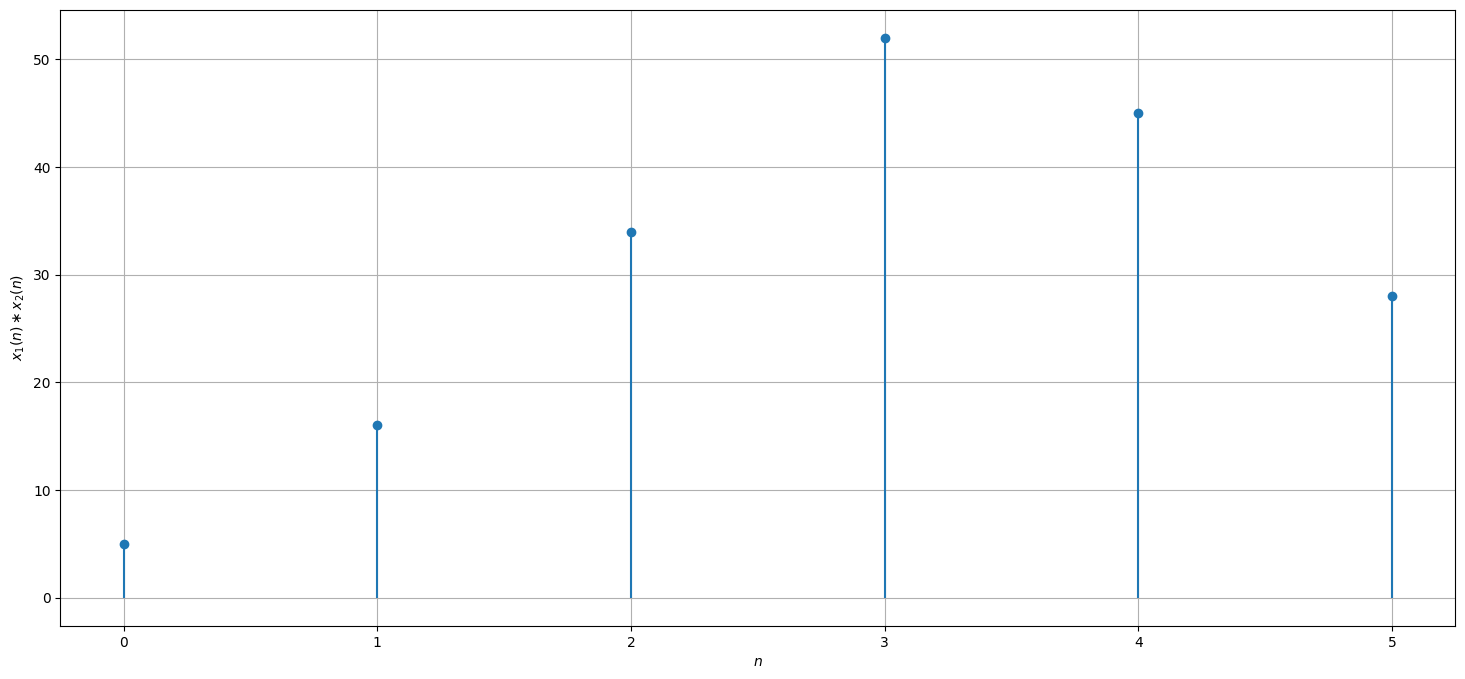

In [7]:
x1= [1,2,3,4]
x2= [5,6,7]

x1_covoluido_com_x2 = convolucao(x1,x2)

plt.figure( figsize=(18,8))
(markerline, stemlines, baseline) = plt.stem(x1_covoluido_com_x2)
plt.xlabel("$n$")
plt.ylabel(r"$x_1(n) \ast x_2(n)$")
plt.grid(True)
baseline.set_visible(False)



## Overlap

In [8]:
def overlap(M, sinal_longo, x2):
    #determina o tamanho de cada secao do sinal longo
    Tamanho_dos_blocos = M 

    #tamanho do sinal resultante da convolucao
    Tamanho_da_convolucao = len(sinal_longo) + len(x2) - 1
    #determina quantas secoes cabem no tamanho da convolucao estipulada, ou seja, quantos passos serao realizados
    qtd_de_passos = mt.ceil(len(sinal_longo)/Tamanho_dos_blocos)
    #vetor overlap do tamanho resultante da convolucao
    overlap = np.zeros(Tamanho_da_convolucao, dtype = complex)

    for i in range(qtd_de_passos):
        indice = i*Tamanho_dos_blocos
        #calculo de convolucao  do sinal longo truncado em M com o sinal x2
        x1_conv_x2 = convolucao(sinal_longo[indice:indice+Tamanho_dos_blocos],x2)
        #preencher o vetor overlap
        overlap[indice:indice + len(x1_conv_x2)] += x1_conv_x2 
    
    return overlap

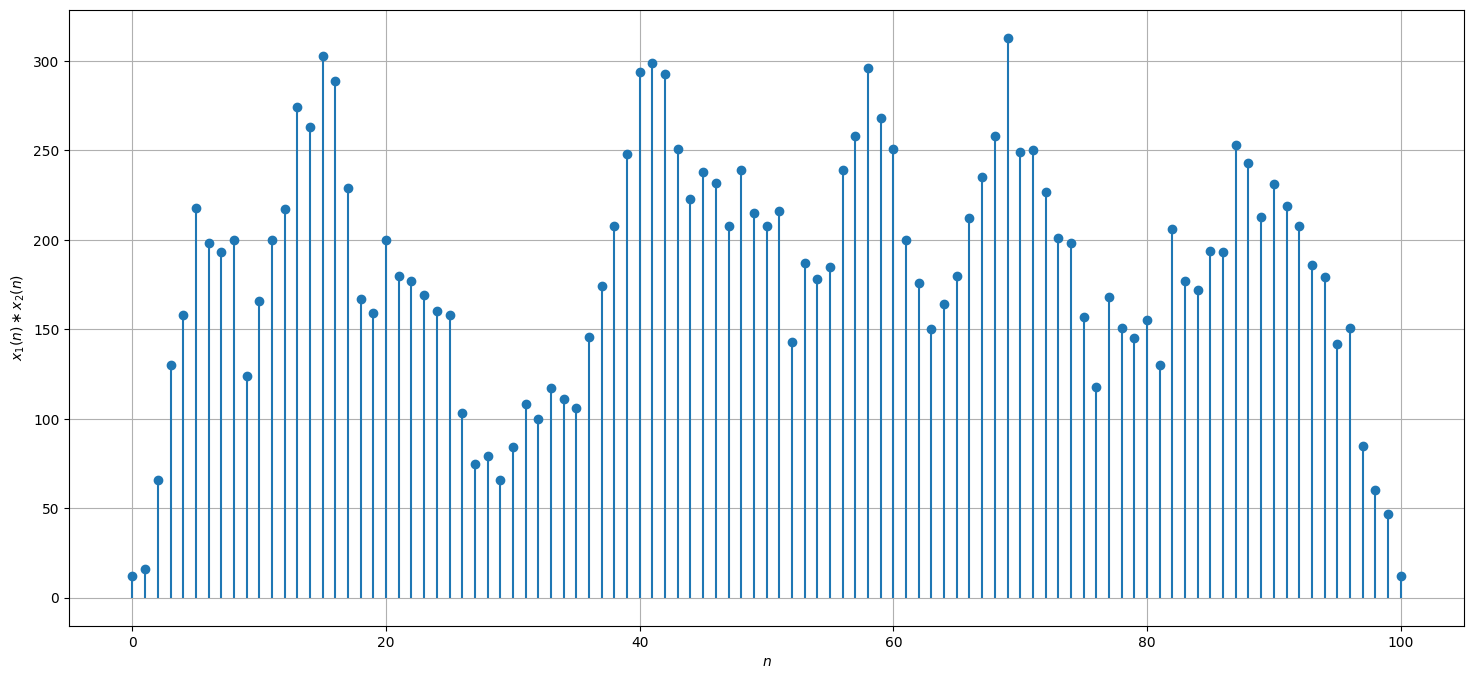

In [10]:
np.random.seed()

sinal_longo = np.random.randint(10,size=95)
x2 = np.random.randint(10,size=7)

OVER = overlap(8,sinal_longo, x2)

direta = convolucao(sinal_longo,x2)
plt.figure( figsize=(18,8))
(markerline, stemlines, baseline) = plt.stem(OVER)
plt.xlabel("$n$")
plt.ylabel(r"$x_1(n) \ast x_2(n)$")
plt.grid(True)
baseline.set_visible(False)